In [4]:
from vnstock import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Some helper functions
def get_financial_data(symbol: str, report_type: str, periods: int, latest_year: int = None) -> pd.DataFrame:
    """
    Helper function to retrieve financial data for a given symbol and report type.
    """
    return financial_report(
        symbol=symbol,
        report_type=report_type,
        frequency='yearly',
        periods=periods,
        latest_year=latest_year
    )

def income_statement(symbols: str, periods: int, latest_year: int) -> pd.DataFrame:
    """
    Get the income statement for the given symbols.
    """
    relevant_items = [
        'Doanh số thuần',
        'Giá vốn hàng bán', 
        'Lãi gộp',
        'Trong đó: Chi phí lãi vay',
        'Lãi/(lỗ) từ hoạt động kinh doanh', 
        'Lãi/(lỗ) thuần sau thuế',
        'EBITDA'
    ]

    income_df = get_financial_data(symbols, 'IncomeStatement', periods, latest_year)
    income_df = income_df[income_df['CHỈ TIÊU'].isin(relevant_items)]
    income_df = income_df.set_index('CHỈ TIÊU')

    return income_df

def balance_sheet(symbols: str, periods: int, latest_year: int) -> pd.DataFrame:
    """
    Get the balance sheet for the given symbols.
    """
    relevant_items = [
        'Tiền và tương đương tiền', 'Giá trị thuần đầu tư ngắn hạn', 'Các khoản phải thu', 'Hàng tồn kho, ròng', 
        'TÀI SẢN NGẮN HẠN','TÀI SẢN DÀI HẠN','GTCL tài sản cố định vô hình','TỔNG TÀI SẢN', 'Nợ ngắn hạn','Nợ dài hạn','NỢ PHẢI TRẢ','VỐN CHỦ SỞ HỮU',
        'Phải trả người bán', 'Vay ngắn hạn', 'Phải trả người lao động'
    ]

    balance_df = get_financial_data(symbols, 'BalanceSheet', periods, latest_year)
    balance_df = balance_df[balance_df['CHỈ TIÊU'].isin(relevant_items)]
    balance_df = balance_df.set_index('CHỈ TIÊU')

    return balance_df

In [6]:
# Get the financial data for the NVL and VHM 
nvl_balance_sheet = balance_sheet('NVL', 6, None)
nvl_income_statement = income_statement('NVL', 6, None)

vhm_balance_sheet = balance_sheet('VHM', 6, None)
vhm_income_statement = income_statement('VHM', 6, None)

--------------------------
# **Horizontal - Vertical Analysis**

- **Horizontal Analysis (Time Series Analysis)**

     - Horizontal Analysis, also known as Time Series Analysis, is a financial analysis technique that compares a business's financial data over multiple consecutive time periods.
    
     - It helps detect and evaluate trends, fluctuations and growth levels of financial indicators such as revenue, profit, total assets and liabilities over time.

- **Vertical Analysis (Common Size Analysis)**

     - Vertical Analysis, also known as Common Size Analysis, is a financial analysis method that compares items in a financial statement with the total value of that financial statement.

     - This method is often used to determine the structure and distribution of income, expenses, assets and liabilities of a business. In this way, it allows to recognize the percentage of each item compared to the total value of the financial statement, helping to better understand the financial structure of the business.

In [7]:
# Perform horizontal - vertical analysis and CAGR calculation
def calculate_cagr(df: pd.DataFrame) -> pd.Series:
    """
    Calculates the Compound Annual Growth Rate (CAGR) for the given DataFrame.
    """
    num_years = len(df.columns) - 1
    cagr = ((df.iloc[:, -1] / df.iloc[:, 0]) ** (1 / num_years) - 1).round(4) * 100
    return cagr


def horizontal_analysis(income_statement: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the horizontal analysis for the given income statement data.
    Args:
        income_statement (pd.DataFrame): DataFrame containing income statement data.
    Returns:
        pd.DataFrame: A DataFrame with coverage ratios.
    """
    # Tạo DataFrame mới để lưu kết quả
    result_df = pd.DataFrame()
    
    # Tính toán giá trị cho các cột mới
    for i in range(1, len(income_statement.columns)):
        result_df[income_statement.columns[i]] = round(((income_statement.iloc[:, i] / income_statement.iloc[:, 1]) - 1) * 100)

    # Tính toán CAGR và thêm vào cuối DataFrame
    result_df['CAGR'] = calculate_cagr(income_statement)
    
    return result_df.loc[['Doanh số thuần', 'Lãi gộp', 'Lãi/(lỗ) thuần sau thuế']]


def vertical_analysis(income_statement: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the vertical analysis for the given income statement data.
    Args:
        income_statement (pd.DataFrame): DataFrame containing income statement data.
    Returns:
        pd.DataFrame: A DataFrame with coverage ratios.
    """
    # Tạo DataFrame mới để lưu kết quả
    result_df = pd.DataFrame()

    # Tính toán giá trị cho các hàng mới
    for col in income_statement.columns[1:]:
        result_df[col] = round((income_statement[col] / income_statement.iloc[0][col]) * 100)

    # Tính toán CAGR và thêm vào cuối DataFrame
    result_df['CAGR'] = calculate_cagr(income_statement)
    
    return result_df.loc[['Doanh số thuần', 'Lãi gộp', 'Lãi/(lỗ) thuần sau thuế']]

In [8]:
print(horizontal_analysis(nvl_income_statement))
print('')
print(horizontal_analysis(vhm_income_statement))

                         2019  2020  2021  2022  2023   CAGR
CHỈ TIÊU                                                    
Doanh số thuần            0.0 -54.0  36.0   2.0 -56.0 -20.83
Lãi gộp                   0.0 -42.0  95.0  35.0 -58.0 -23.83
Lãi/(lỗ) thuần sau thuế   0.0  15.0   2.0 -36.0 -86.0 -31.74

                         2019  2020  2021  2022   2023   CAGR
CHỈ TIÊU                                                     
Doanh số thuần            0.0  39.0  65.0  21.0  101.0  21.78
Lãi gộp                   0.0  -6.0  77.0  12.0   30.0  28.83
Lãi/(lỗ) thuần sau thuế   0.0  16.0  60.0  20.0   38.0  17.81


In [9]:
print(vertical_analysis(nvl_income_statement))
print('')
print(vertical_analysis(vhm_income_statement))

                          2019   2020   2021   2022   2023   CAGR
CHỈ TIÊU                                                         
Doanh số thuần           100.0  100.0  100.0  100.0  100.0 -20.83
Lãi gộp                   29.0   36.0   41.0   38.0   28.0 -23.83
Lãi/(lỗ) thuần sau thuế   31.0   78.0   23.0   20.0   10.0 -31.74

                          2019   2020   2021   2022   2023   CAGR
CHỈ TIÊU                                                         
Doanh số thuần           100.0  100.0  100.0  100.0  100.0  21.78
Lãi gộp                   53.0   36.0   57.0   49.0   34.0  28.83
Lãi/(lỗ) thuần sau thuế   47.0   39.0   46.0   47.0   32.0  17.81


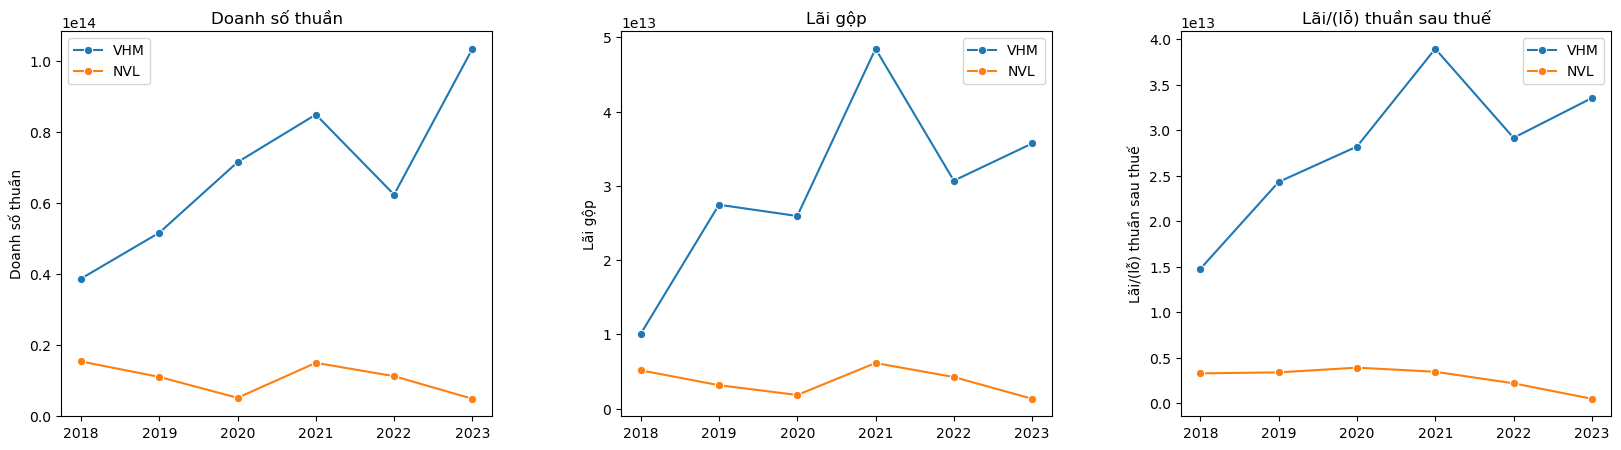

In [10]:
def plot_trend_line(income_statement, label):
    income_statement_transpose = income_statement.transpose()
    selected_columns = [0, 2, 5]  # Adjusted selected columns

    for i, cat_col in enumerate(income_statement_transpose.columns[selected_columns]):
        plt.subplot(1, 3, i+1)
        sns.lineplot(data = income_statement_transpose[cat_col], marker='o', label=label)
        plt.title(cat_col)
        plt.xticks(rotation=0)
        plt.legend()

# Width and Height of figure
plt.figure(figsize=(20,5)) 
plt.subplots_adjust(wspace=0.3)

plot_trend_line(vhm_income_statement, "VHM")
plot_trend_line(nvl_income_statement, "NVL")

plt.show()

-------------------
# **Liquidity Ratios**

- **Current Ratio**:
     ```md
          Current Assets / Current Liabilities
     ```
     - This index measures the ability of a business to pay short-term debt with short-term assets.
     - A higher ratio shows that the business has the ability to pay short-term debt more easily.

- **Quick Ratio**:
     ```md
          (Current assets - Inventory) / Current Liabilities
     ```
     - This index is similar to the Current Ratio but eliminates assets that are easily converted into cash, such as inventory.
     - This describes the ability to pay off debt without having to sell inventory, an asset that cannot be immediately converted into cash.

- **Cash Ratio**:
     ```md
          (Cash + Cash Equivalents) / Current Liabilities
     ```
     - This index measures the ability of a business to pay short-term debt with cash or cash equivalent assets.
     - A higher ratio shows that the business has the ability to pay short-term debt more easily.

In [11]:
# Calculate liquidity ratios
def liquidity_ratio(balance_sheet: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the liquidity ratio for the given income statement data.
    Args:
        balance_sheet (pd.DataFrame): DataFrame containing balance sheet data.
    Returns:
        pd.DataFrame: A DataFrame with coverage ratios.
    """

    # Get the relevant data
    total_assets      = balance_sheet.iloc[0]
    assets            = balance_sheet.iloc[1]
    cash              = balance_sheet.iloc[2]
    investments       = balance_sheet.iloc[3]
    inventory         = balance_sheet.iloc[5]
    total_liabilities = balance_sheet.iloc[8]
    liabilities       = balance_sheet.iloc[9]

    # Calculate the ratios
    current_ratio = total_assets / total_liabilities
    quick_ratio   = (assets - inventory) / liabilities
    cash_ratio    = (cash + investments) / liabilities

    # Create the result DataFrame
    result_df = pd.DataFrame({
        'Current Ratio': current_ratio.round(2),
        'Quick Ratio': quick_ratio.round(2),
        'Cash Ratio': cash_ratio.round(2)
    })
    return result_df.transpose()

In [12]:
print(liquidity_ratio(nvl_balance_sheet))
print('')
print(liquidity_ratio(vhm_balance_sheet))

               2018  2019  2020  2021  2022  2023
Current Ratio  1.41  1.37  1.28  1.26  1.21  1.23
Quick Ratio    0.68  0.74  0.87  0.93  0.81  0.60
Cash Ratio     0.44  0.37  0.39  0.37  0.11  0.04

               2018  2019  2020  2021  2022  2023
Current Ratio  1.67  1.49  1.71  2.33  1.70  1.70
Quick Ratio    1.27  0.65  0.57  0.87  0.70  0.89
Cash Ratio     0.11  0.11  0.15  0.13  0.09  0.08


----------------------------
# **Solvency Ratios**

- **Debt to Assets Ratios (D/A)**
    ```md
        (Short-Term Debt + Long-Term Debt) / Total Assets
    ```

    - This index measures the ratio between debt and assets of a business.
    - It shows the percentage of a business's assets that are financed by debt.
    - A higher ratio shows high financial risk because the business depends too much on debt.

- **Equity Ratios (E/A)**
    ```md
        Total Equity / Total Assets
    ```

    - This index measures the ratio between equity and assets of a business.
    - It represents the percentage of assets owned by shareholders instead of being financed by debt.
    - A higher ratio can indicate a good level of financial stability.


- **Debt to Equity Ratios (D/E)**
    ```md
        Total Liability / Total Equity
    ```
    
    - This index measures the ratio between debt and equity of a business.
    - It provides information about the extent to which a business is financed with debt compared to the capital that shareholders have invested.
    - A lower ratio can indicate a more stable financial situation because the business does not rely too much on debt.

In [13]:
# Calculate profitability ratios
def solvency_ratio(balance_sheet: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the solvency ratios for the given balance sheet data.
    """
    # Get the relevant data
    total_assets      = balance_sheet.iloc[0]
    total_liabilities = balance_sheet.iloc[8]
    equity            = balance_sheet.iloc[-1]

    # Calculate the ratios
    debt_ratio           = total_liabilities / total_assets
    debt_to_equity_ratio = total_liabilities / equity
    equity_ratio         = equity / total_assets

    # Create the result DataFrame
    result_balance_sheet = pd.DataFrame({
        'D/A': debt_ratio.round(2),
        'D/E': debt_to_equity_ratio.round(2),
        'E/A': equity_ratio.round(2)
    })

    return result_balance_sheet.transpose()

In [14]:
print(solvency_ratio(nvl_balance_sheet))
print('')
print(solvency_ratio(vhm_balance_sheet))

     2018  2019  2020  2021  2022  2023
D/A  0.71  0.73  0.78   0.8  0.83  0.81
D/E  2.46  2.68  3.53   3.9  4.75  4.33
E/A  0.29  0.27  0.22   0.2  0.17  0.19

     2018  2019  2020  2021  2022  2023
D/A  0.60  0.67  0.59  0.43  0.59  0.59
D/E  1.49  2.05  1.42  0.75  1.44  1.43
E/A  0.40  0.33  0.41  0.57  0.41  0.41


----------------------
# **Profitability Ratios**:
- ### **Profit Margin**
    - **Gross Profit Margin (GPM)**
        ```md
            gross profit / revenue
        ```

        - This index shows the percentage of gross profit compared to a business's revenue after eliminating production costs.
        - A higher gross profit ratio usually shows that a business is able to manage production costs effectively.

    - **Operating Profit Margin (OPM)**
        ```md
            operating profit / revenue
        ```

        - This index measures the percentage of operating profit compared to a business's revenue.
        - It indicates the ability of a business to profit from its primary business after eliminating all other operating expenses.

    - **Net Profit Margin (NPM)**
        ```md
            net profit/revenue
        ```

        - This index measures the percentage of net profit compared to a business's revenue.
        - It shows the percentage of final profit that the business has after eliminating all costs, including operating costs and financial costs.

- ### **Return on Assets (ROA)**
    ```rm
        Return on Assets = Net Income / Total Assets
    ```

    - This index measures a business's performance in using assets to generate profits.
    - It represents the percentage of profit compared to the total assets of the business.
    - A high ROA shows that a business is using its assets effectively to generate profits.

- ### **Return on Equity (ROE)**
    ```rm
        Return on Equity = Net Income / Total Equity
    ```

    - This index measures the level of profitability that a business is generating for investors.
    - It represents the percentage of profit compared to the equity of the business.
    - A high ROE usually indicates that the business is effectively generating profits from the capital that shareholders have invested.

However

Compare with the past and businesses in the same industry to see the ability of these businesses to generate profits on assets.

In [15]:
# Calculate profitability ratios and ROA, ROE
# Calculate ROA and ROE
def ROE_ROA(balance_sheet: pd.DataFrame, income_statement: pd.DataFrame) -> pd.DataFrame:
    """
    Performs ROA and ROE calculation on the DataFrame.
    Args:
        balance_sheet (pd.DataFrame): DataFrame containing balance sheet data.
        income_statement (pd.DataFrame): DataFrame containing income statement data.
    Returns:
        pd.DataFrame: A DataFrame with ROA and ROE ratios.
    """
    result_df = pd.DataFrame()

    income_df = income_statement.reset_index()
    balance_df = balance_sheet.reset_index()

    for i in range(1, len(income_df.columns) - 1):
        # Store Net Income and Assets
        net_income = income_df.iloc[-1, i + 1]
        first_assets = balance_df.iloc[0, i]
        second_assets = balance_df.iloc[0, i + 1]

        # Store Net Income and Equity
        first_equity = balance_df.iloc[-1, i]
        second_equity = balance_df.iloc[-1, i + 1]

        # Calculate the ratios
        ROA = net_income / ((first_assets + second_assets) / 2) * 100
        ROE = net_income / ((first_equity + second_equity) / 2) * 100

        # Store the ratios in the result dataframe
        result_df[balance_df.columns[i + 1]] = pd.Series({
            'ROA': ROA.round(2),
            'ROE': ROE.round(2)
        })

    return result_df

# Calculate profitability ratios
def profitability_ratio(balance_sheet: pd.DataFrame, income_statement: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the profitability ratios for the given income statement data.
    Args:
        balance_sheet (pd.DataFrame): DataFrame containing balance sheet data.
        income_statement (pd.DataFrame): DataFrame containing income statement data.
    Returns:
        pd.DataFrame: A DataFrame with profitability ratios.
    """
    # Get the relevant data
    revenue = balance_sheet.iloc[0]
    gross_profit = balance_sheet.iloc[2]
    operating_profit = balance_sheet.iloc[3]
    net_profit = balance_sheet.iloc[4]

    # Calculate the ratios
    GPM = gross_profit / revenue
    OPM = operating_profit / revenue
    NPM = net_profit / revenue

    # Create the result DataFrame
    result_df = pd.DataFrame({
        'GPM': GPM.round(2),
        'OPM': OPM.round(2),
        'NPM': NPM.round(2)
    })
    ROA_ROE = ROE_ROA(balance_sheet, income_statement)
    result_df = pd.concat([result_df.transpose(), ROA_ROE], axis=0)

    return result_df

In [16]:
print(profitability_ratio(nvl_balance_sheet, nvl_income_statement))
print(' ')
print(profitability_ratio(vhm_balance_sheet, vhm_income_statement))

     2018  2019  2020  2021  2022  2023
GPM  0.18  0.07  0.08  0.09  0.03  0.01
OPM  0.00  0.01  0.00  0.00  0.00  0.00
NPM  0.08  0.07  0.10  0.13  0.20  0.19
ROA   NaN -1.37  0.95  1.30  0.66  0.26
ROE   NaN -4.91  3.95  6.16  3.55  1.43
 
     2018   2019   2020   2021   2022   2023
GPM  0.03   0.07   0.06   0.02   0.03   0.03
OPM  0.01   0.00   0.01   0.02   0.02   0.01
NPM  0.36   0.24   0.16   0.16   0.27   0.30
ROA   NaN  14.87  10.47  19.51   9.06   7.29
ROE   NaN  41.77  28.09  39.44  19.17  17.75


-----------------------
# **Efficiency Ratios**

- **Asset Turnover Ratio (ATR)**
    
    ```markdown
        Total Sales / Average Assets
        Average Assets = (Assets at the beginning of the year + Assets at the end of the year) / 2
    ```

    - This ratio measures a business's ability to use assets to generate sales.
    - It represents the number of times a business's average assets are turned over in a certain period of time.
    - A higher ratio usually indicates good asset utilization efficiency.

- **Inventory Turnover Ratio (ITR)**
    ```markdown
        Cost of Good Sold / Average Inventory
        Average Inventory = (Inventory at the beginning of the year + Inventory at the end of the year) / 2
    ```
    - This ratio measures a business's ability to manage and sell inventory.
    - It indicates the number of times inventory is sold during a certain period of time.
    - A high ratio often indicates that a business is managing and selling inventory effectively, but can also indicate a low risk of over-inventory.

In [17]:
# Calculate efficiency ratios
def efficienty_ratio(balance_sheet: pd.DataFrame, income_statement: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the efficiency ratios for the given income statement data.
    Args:
        balance_sheet (pd.DataFrame): DataFrame containing balance sheet data.
        income_statement (pd.DataFrame): DataFrame containing income statement data.
    Returns:
        pd.DataFrame: A DataFrame with efficiency ratios.
    """
    result_df = pd.DataFrame()

    income_df = income_statement.reset_index()
    balance_df = balance_sheet.reset_index()

    for i in range(1, len(income_df.columns) - 1):
        # Store Total Sales and Assets
        sales = income_df.iloc[0,i+1]
        first_assets = balance_df.iloc[0,i]
        second_assets = balance_df.iloc[0,i+1]
        
        # Store COGS and Inventory
        inventory = income_df.iloc[1,i+1]
        first_inventory = balance_df.iloc[5,i]
        second_inventory = balance_df.iloc[5,i+1]

        # Calculate the ratios
        atr = sales / ((first_assets + second_assets) / 2)
        itr = inventory / ((first_inventory + second_inventory) / 2)

        # Store the ratios in the result dataframe
        result_df[balance_df.columns[i]] = pd.Series({
            'ATR': atr.round(2),
            'ITR': itr.round(2)
        })
        
    return result_df



In [18]:
print(efficienty_ratio(nvl_balance_sheet, nvl_income_statement))
print('')
print(efficienty_ratio(vhm_balance_sheet, vhm_income_statement))

     2018  2019  2020  2021  2022
ATR  0.14  0.04  0.09  0.05  0.02
ITR -0.18 -0.04 -0.09 -0.06 -0.03

     2018  2019  2020  2021  2022
ATR  0.33  0.35  0.38  0.21  0.26
ITR -0.50 -0.88 -1.02 -0.68 -1.13
